<a href="https://colab.research.google.com/github/satyamanikantareddychintapalli/FMML_LAB_23B21A4555/blob/main/Copy_of_Module_7_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab by Ganesh Chandan

kanakala.ganesh@research.iiit.ac.in

## Matrix Factorization (Based on Recommender System Example)

Matrix factorization is a way to generate latent features when multiplying two different kinds of entities. Collaborative filtering is the application of matrix factorization useful to identify the relationship between items’ and users’ entities in a recommender system.

Define a set of Users (U), items (D), R size of |U|, and |D|. The matrix |U|\*|D| includes all the ratings given by users. The goal is to discover K latent features. Given with the input of two matrics matrices P (|U|\*k) and Q (|D|\*k), it would generate the product result R.

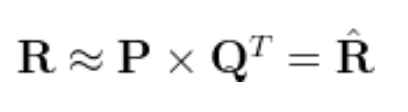

Matrix P represents the association between a user and the features while matrix Q represents the association between an item and the features. We can get the prediction of a rating of an item by the calculation of the dot product of the two vectors corresponding to u_i and d_j.

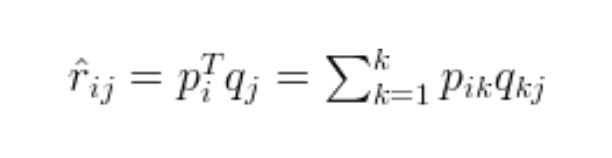

To get two entities of both P and Q, we need to initialize the two matrices and calculate the difference of the product named as matrix M. Next, we minimize the difference through the iterations. The method is called gradient descent, aiming at finding a local minimum of the difference.

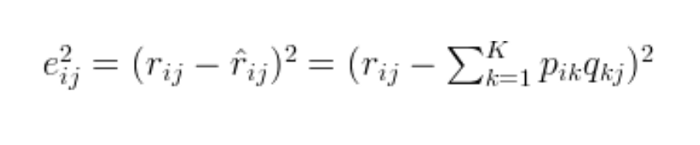

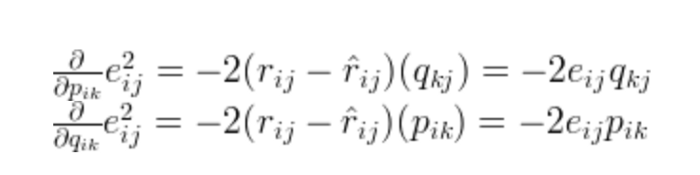

In [ ]:
import numpy

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    '''
    R: rating matrix
    P: |U| * K (User features matrix)
    Q: |D| * K (Item features matrix)
    K: latent features
    steps: iterations
    alpha: learning rate
    beta: regularization parameter'''
    Q = Q.T

    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    # calculate error
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])

                    for k in range(K):
                        # calculate gradient with a and beta parameter
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        # 0.001: local minimum
        if e < 0.001:
            break

    return P, Q.T

In [ ]:
R = [
     [5,3,0,1],
     [4,0,0,1],
     [1,1,0,5],
     [1,0,0,4],
     [0,1,5,4],
     [2,1,3,0],
    ]

R = numpy.array(R)
# N: num of User
N = len(R)
# M: num of Movie
M = len(R[0])
# Num of Features
K = 3


P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)



nP, nQ = matrix_factorization(R, P, Q, K)

nR = numpy.dot(nP, nQ.T)

The predicted matrix is generated below. As you can see, the predicted matrix has similar output with the true values, and the 0 ratings are replaced with the prediction based on the similar users’ preferences on movies.

In [ ]:
print(nR)

[[4.98052681 2.96379295 3.90327345 1.00545039]
 [3.97574967 1.48092097 3.49253315 1.00210119]
 [1.01058635 0.96999152 4.2483761  4.97388025]
 [0.99781408 1.4447402  3.37837065 3.9832918 ]
 [2.89847078 1.01265791 4.98601613 3.98427538]
 [1.9849492  1.04350287 2.97960307 2.26556727]]


## SVD (Continuing the Recommender System Example)

When it comes to dimensionality reduction, the Singular Value Decomposition (SVD) is a popular method in linear algebra for matrix factorization in machine learning. Such a method shrinks the space dimension from N-dimension to K-dimension (where K < N) and reduces the number of features. SVD constructs a matrix with the row of users and columns of items and the elements are given by the users’ ratings. Singular value decomposition decomposes a matrix into three other matrices and extracts the factors from the factorization of a high-level (user-item-rating) matrix.

The factorisation of this matrix is done by the singular value decomposition. It finds factors of matrices from the factorisation of a high-level (user-item-rating) matrix. The singular value decomposition is a method of decomposing a matrix into three other matrices as given below:

image.png

Where A is a m x n utility matrix, U is a m x r orthogonal left singular matrix, which represents the relationship between users and latent factors, S is a r x r diagonal matrix, which describes the strength of each latent factor and V is a r x n diagonal right singular matrix, which indicates the similarity between items and latent factors. The latent factors here are the characteristics of the items, for example, the genre of the music. The SVD decreases the dimension of the utility matrix A by extracting its latent factors. It maps each user and each item into a r-dimensional latent space. This mapping facilitates a clear representation of relationships between users and items.

## Working with Text 1 : Bag of Words Model

A problem with modeling text is that it is messy, and techniques like machine learning algorithms prefer well defined fixed-length inputs and outputs. Machine learning algorithms cannot work with raw text directly; the text must be converted into numbers. Specifically, vectors of numbers.

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

The approach is very simple and flexible, and can be used in a myriad of ways for extracting features from documents.

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

    A vocabulary of known words.
    A measure of the presence of known words.


Let's try BoW model on an example

The sentences are -

1.   grey is a dull color
2.   orange is a fruit
3.   orange is a colour


In [ ]:
sentences = [["grey", "is", "a", "dull", "colour"], ["orange", "is", "a", "fruit"], ["orange", "is", "a", "colour"]]
# Add your sentences here and see the embeddings

# The vocabulary is -
# vocabulary = ["grey", "is", "a", "dull", "colour", "orange", "fruit"]

vocabulary = []
for sentence in sentences:
  for word in sentence:
    if word not in vocabulary:
      vocabulary.append(word)

print(vocabulary)

['grey', 'is', 'a', 'dull', 'colour', 'orange', 'fruit']


Now we need to find which words occur in a given sentence and hence assign each sentence a corresponding vector based upon multiple metrics.

This can be done in a few ways :
1. Boolean count of whether the word occurs in a sentence
2. Counts of each word that occurs in a sentence
3. Frequency of words out of all oher words in a sentence
4. TF-IDF (will be covered in next lab)

In [ ]:
# We shall implement point 2 now

bow_sentences = []

for sentence in sentences:
  bow_representation = [0 for i in range(len(vocabulary))]
  for indx, word in enumerate(vocabulary):
    if word in sentence:
      bow_representation[indx]+=1
  bow_sentences.append(bow_representation)

In [ ]:
print(bow_sentences)

[[1, 1, 1, 1, 1, 0, 0], [0, 1, 1, 0, 0, 1, 1], [0, 1, 1, 0, 1, 1, 0]]


**You can now try to add your sentences and see how it works!**

## Working with Text 2 : LSI (Latent Semantic Indexing)

Now, we will introduce an indexing and retrieval method: the Latent Semantic Indexing (LSI). It uses a mathematical technique called singular value decomposition (SVD) to identify patterns in the relationships between the terms and concepts contained in a corpus (unstructured collection of documents).

Latent Semantic Indexing is a common technique in the NLP field. It is used to analyze relationships between a set of documents and the terms they contain in order to produce a set of concepts related to the documents and terms.

LSI is based on the distributional hypothesis which states that words that are close in meaning will occur in similar pieces of text. The starting point is the representation matrix $A$ of the distribution of the words within the set of documents. It is a $m * n$ matrix where $m$ is the number of unique words and $n$ is the corpus cardinality. The element $a_{ij}$ represents the frequency of the word $i$ in the document $j$.

Singular Value Decomposition (SVD) is consequently applied to the matrix A in order to reduce the dimensionality of the data.

The SVD computes the term and document vector spaces by approximating the single term-frequency matrix $A$ as follows:

$$
A \approx TSD^T
$$

where $T$ is the $m * r$ term-concept vector matrix, $S$ is the $r * r$ singular values matrix, $D$ is the $n * r$ concept-document vector matrix, such that

$$
T^{T}T = I_r \\
D^{T}D = I_r \\
S_{11}\ge S_{22}\ge ... \ge S_{rr} \ge 0 \\ S_{ij}=0 \hspace{1cm} \forall i \ne j
$$

The next step is to truncate the SVD and keep only the largest $k$ << $r$ diagonal entries in the singular value matrix $S$, where $k$ is typically on the order 100 to 300 dimensions. This effectively reduces the term matrix $T$ size to $m * k$ and the document matrix $D$ size to $n * k$.

Let us now get started with the code! Note that we will use a library **gensim**, which does most of the hard work for us.

In [ ]:
import gensim
import gensim.models
from gensim import corpora
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Sample corpus
documents = [
    "Artificial intelligence is a branch of computer science.",
    "Machine learning is a subset of artificial intelligence.",
    "Deep learning is part of machine learning.",
    "Natural language processing is a field of AI.",
    "AI is transforming industries with automation."
]

# Step 1: Tokenize and preprocess the documents
texts = [[word.lower() for word in doc.split()] for doc in documents]

# Step 2: Create a dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Step 3: Apply Latent Semantic Indexing (LSI)
lsi_model = gensim.models.LsiModel(corpus, id2word=dictionary, num_topics=2)  # k=2 topics

# Step 4: Print the topics
for topic in lsi_model.print_topics(num_topics=2, num_words=5):
    print(topic)

# Step 5: Transform a new document and find similarity
query_doc = "AI is used in deep learning and machine learning."
query_bow = dictionary.doc2bow(query_doc.lower().split())
query_lsi = lsi_model[query_bow]

# Compute similarity
index = gensim.similarities.MatrixSimilarity(lsi_model[corpus])
sims = index[query_lsi]

# Print similarity scores
print("\nDocument Similarity Scores:")
for doc_number, score in enumerate(sims):
    print(f"Document {doc_number + 1}: {score:.4f}")


(0, '0.513*"is" + 0.471*"of" + 0.369*"a" + 0.258*"artificial" + 0.239*"learning"')
(1, '0.387*"learning" + 0.387*"machine" + -0.258*"a" + -0.258*"natural" + -0.258*"processing"')

Document Similarity Scores:
Document 1: 0.3994
Document 2: 0.8826
Document 3: 0.9962
Document 4: 0.0817
Document 5: 0.6924


In [ ]:
# Install requires lirbaries

!pip install --upgrade gensim
import pandas as pd
import gensim
from gensim.parsing.preprocessing import preprocess_documents

In [ ]:
# !curl -L -o 'movies.csv' 'https://drive.google.com/uc?export=download&id=1F9l2PUvLtmd75_VFrqNnH-x_AR7zIhQW'

!curl -L -o 'wiki_movies_plots_deduped.csv' 'https://drive.usercontent.google.com/u/0/uc?id=12k4ltUwdhg525XW4dT6hgW18t_Fil3Hj&export=download'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 77.4M  100 77.4M    0     0  4848k      0  0:00:16  0:00:16 --:--:-- 18.7M


In [ ]:
df = pd.read_csv('wiki_movies_plots_deduped.csv', sep=',', usecols = ['Release Year', 'Title', 'Plot'])
df = df[df['Release Year'] >= 2000] # Use a subset of the data
text_corpus = df['Plot'].values # Get the movie plots

In [ ]:
print(text_corpus)

["After three years in prison, Cruella de Vil has been cured of her desire for fur coats by Dr. Pavlov and is released into the custody of the probation office on the provision that she will be forced to pay the remainder of her fortune (eight million pounds) to all the dog shelters in the borough of Westminster should she repeat her crime. Cruella therefore mends her working relationship with her valet Alonzo and has him lock away all her fur coats. Cruella's probation officer, Chloe Simon, nevertheless suspects her, partly because Chloe is the owner of the now-adult Dipstick (one of the original 15 puppies from the previous film) who moved from Roger and Anita's house to her house.\r\nDipstick's mate, Dottie, has recently given birth to three puppies: Domino, Little Dipper and Oddball (who lacks spots). To mend her reputation, Cruella buys the Second Chance Dog shelter, owned by Kevin Shepherd, to resolve its financial insolvency that is on the verge of eviction. Meanwhile, Dr. Pavlo

In [ ]:
processed_corpus = preprocess_documents(text_corpus) # Preprocess the text
dictionary = gensim.corpora.Dictionary(processed_corpus)
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus] # Find the BoW representations

In [ ]:
tfidf = gensim.models.TfidfModel(bow_corpus, smartirs='npu') # Perform TF-IDF to get the matrix
corpus_tfidf = tfidf[bow_corpus]

In [ ]:
lsi = gensim.models.LsiModel(corpus_tfidf, num_topics=1000) # Perform LSI
index = gensim.similarities.MatrixSimilarity(lsi[corpus_tfidf])

In [ ]:
new_doc = "In the arcade at night the video game characters leave their games. The protagonist is a girl from a candy racing game who glitches"
# new_doc = "Boy studies ballet in secret. His father wants him to go to the gym and boxe. They raise money for audition in London"

new_doc = gensim.parsing.preprocessing.preprocess_string(new_doc)
new_vec = dictionary.doc2bow(new_doc)
vec_bow_tfidf = tfidf[new_vec]
vec_lsi = lsi[vec_bow_tfidf]
sims = index[vec_lsi]
for s in sorted(enumerate(sims), key=lambda item: -item[1])[:10]:
    print(f"{df['Title'].iloc[s[0]]} : {str(s[1])}")

Candlestick : 0.7908881
Overlord: The Undead King : 0.77280533
Overlord: The Dark Warrior : 0.77280533
Kami-sama no Iu Toori : 0.699381
Wreck-It Ralph : 0.6745317
Inferno : 0.6701582
Sex Competition : 0.6644339
 Facing the Giants : 0.62499785
Glory Road : 0.60973674
Sleuth : 0.5919652


As you can see we give the description of the movie "Wreck-it Ralph" and it appears as the third recommended. We are doing a great job with LSI!

Feel free to change the description and see what movies you get :)

## Points to think about

1. How exactly does matrix factorization help us in the recommendation procedure? Why can we not simply model the user-movie matrix?

2. What do the rows of the matrix $T$ represent? (Definition of $T$ is above in the introduction to LSI).

QUESTION 1

In recommendation systems (such as movie recommendations), we often use a user-item matrix (e.g., users vs. movies, where entries represent ratings or interactions). The problem with directly modeling this matrix is:

Data Sparsity – Most users rate only a few movies, leading to a large matrix with many missing values.
High Dimensionality – If we have millions of users and movies, the matrix is enormous and computationally expensive.
Cold Start Problem – New users or items have little data, making recommendations difficult.
Overfitting & Noise – Directly modeling the matrix captures noise instead of real latent patterns.
Matrix Factorization helps solve these issues by reducing the dimensionality and discovering latent factors (hidden features that influence ratings).

How Does Matrix Factorization Work?
Matrix factorization decomposes the user-movie matrix
𝐴
A into two smaller matrices:

𝐴
≈
𝑈
⋅
𝑆
⋅
𝑉
𝑇
A≈U⋅S⋅V
T

𝑈
U represents users and their latent preferences.
𝑆
S contains singular values (importance of features).
𝑉
V represents items (movies) and their latent properties.
By reducing dimensions (keeping only top
𝑘
k singular values), we can:

Capture meaningful patterns (e.g., "action movie lovers" vs. "romance lovers").
Predict missing values for better recommendations.
Popular techniques include:

Singular Value Decomposition (SVD)
Alternating Least Squares (ALS)
Non-Negative Matrix Factorization (NMF)



QUESTION 2

In Latent Semantic Indexing (LSI), the matrix
𝑇
T (term-concept matrix) is obtained from Singular Value Decomposition (SVD):

𝐴
≈
𝑇
𝑆
𝐷
𝑇
A≈TSD
T

Rows of
𝑇
T correspond to unique words (terms) in the document collection.
Columns of
𝑇
T represent latent topics (concepts) extracted from the documents.
Each element
𝑡
𝑖
𝑗
t
ij
​
  in
𝑇
T represents the association strength between word
𝑖
i and latent topic
𝑗
j.
Example
If a document collection is about "Movies" and "Technology," LSI might extract:

Topic 1: "Sci-fi, AI, Robotics" (Technology)
Topic 2: "Romance, Drama, Comedy" (Movies)

## Resources and References

1. https://medium.com/betacom/latent-semantic-indexing-in-python-85880414b4de
2. https://www.analyticssteps.com/blogs/introduction-latent-semantic-analysis-lsa-and-latent-dirichlet-allocation-lda
3. https://towardsdatascience.com/recommendation-system-matrix-factorization-d61978660b4b
4. https://analyticsindiamag.com/singular-value-decomposition-svd-application-recommender-system/
5. https://machinelearningmastery.com/gentle-introduction-bag-words-model/

# Exercise
* Try out different modes of bag of words
* Experiment with different plots from the sheet and check the scores


In [ ]:
!pip install nltk
!pip install gensim
import gensim
import gensim.models
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import numpy as np
import pandas as pd

# Download required NLTK resources
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('punkt_tab') # Download the punkt_tab model

# Sample Corpus (Modify or Load Your Own Dataset)
documents = [
    "Artificial intelligence is a branch of computer science.",
    "Machine learning is a subset of artificial intelligence.",
    "Deep learning is part of machine learning.",
    "Natural language processing is a field of AI.",
    "AI is transforming industries with automation."
]

# --- Preprocessing Functions ---
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]  # Lemmatize & remove stopwords
    return " ".join(tokens)

preprocessed_docs = [preprocess_text(doc) for doc in documents]

# --- Different Bag of Words Models ---
# 1. Basic BoW (Word Counts)
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(preprocessed_docs)
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# 2. TF-IDF Weighted BoW
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_docs)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# 3. N-Gram Model (Bi-grams & Tri-grams)
ngram_vectorizer = CountVectorizer(ngram_range=(2,3))
ngram_matrix = ngram_vectorizer.fit_transform(preprocessed_docs)
ngram_df = pd.DataFrame(ngram_matrix.toarray(), columns=ngram_vectorizer.get_feature_names_out())

# --- Convert BoW to Gensim Format ---
def bow_to_gensim(matrix, vectorizer):
    words = vectorizer.get_feature_names_out()
    dictionary = corpora.Dictionary([words])
    corpus = [dictionary.doc2bow(doc.split()) for doc in preprocessed_docs]
    return dictionary, corpus

dictionary, corpus = bow_to_gensim(count_matrix, count_vectorizer)

# --- Train LSI Model ---
lsi_model = gensim.models.LsiModel(corpus, id2word=dictionary, num_topics=2)

# --- Print Topics ---
print("\nLSI Topics:")
for topic in lsi_model.print_topics(num_topics=2, num_words=5):
    print(topic)

# --- Compare Different BoW Models ---
print("\nBasic BoW Representation:\n", count_df)
print("\nTF-IDF Representation:\n", tfidf_df)
print("\nN-Gram Representation:\n", ngram_df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



LSI Topics:
(0, '-0.680*"learning" + -0.440*"machine" + -0.288*"intelligence" + -0.288*"artificial" + -0.240*"part"')
(1, '0.581*"ai" + 0.359*"language" + 0.359*"processing" + 0.359*"field" + 0.359*"natural"')

Basic BoW Representation:
    ai  artificial  automation  branch  computer  deep  field  industry  \
0   0           1           0       1         1     0      0         0   
1   0           1           0       0         0     0      0         0   
2   0           0           0       0         0     1      0         0   
3   1           0           0       0         0     0      1         0   
4   1           0           1       0         0     0      0         1   

   intelligence  language  learning  machine  natural  part  processing  \
0             1         0         0        0        0     0           0   
1             1         0         1        1        0     0           0   
2             0         0         2        1        0     1           0   
3             0 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



LSI Topics:
(0, '-0.680*"learning" + -0.440*"machine" + -0.288*"artificial" + -0.288*"intelligence" + -0.240*"part"')
(1, '-0.581*"ai" + -0.359*"language" + -0.359*"processing" + -0.359*"field" + -0.359*"natural"')

Basic BoW Representation:
    ai  artificial  automation  branch  computer  deep  field  industry  \
0   0           1           0       1         1     0      0         0   
1   0           1           0       0         0     0      0         0   
2   0           0           0       0         0     1      0         0   
3   1           0           0       0         0     0      1         0   
4   1           0           1       0         0     0      0         1   

   intelligence  language  learning  machine  natural  part  processing  \
0             1         0         0        0        0     0           0   
1             1         0         1        1        0     0           0   
2             0         0         2        1        0     1           0   
3          

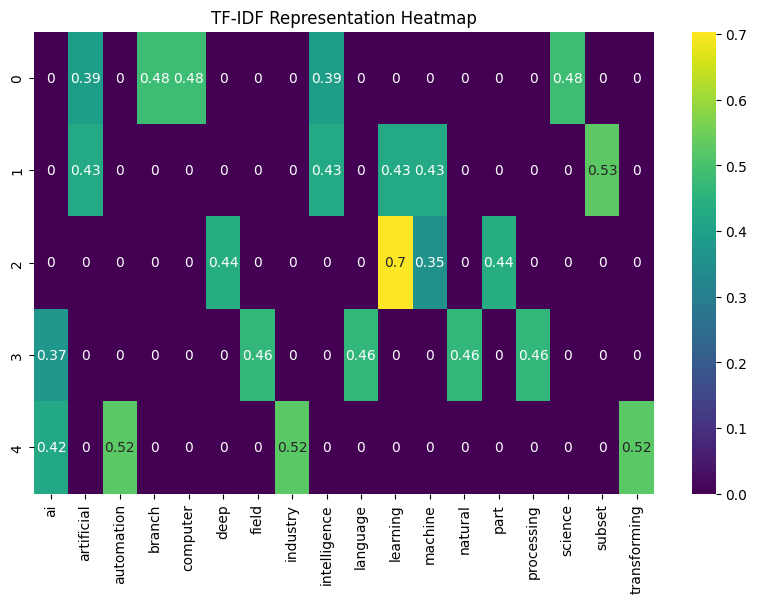

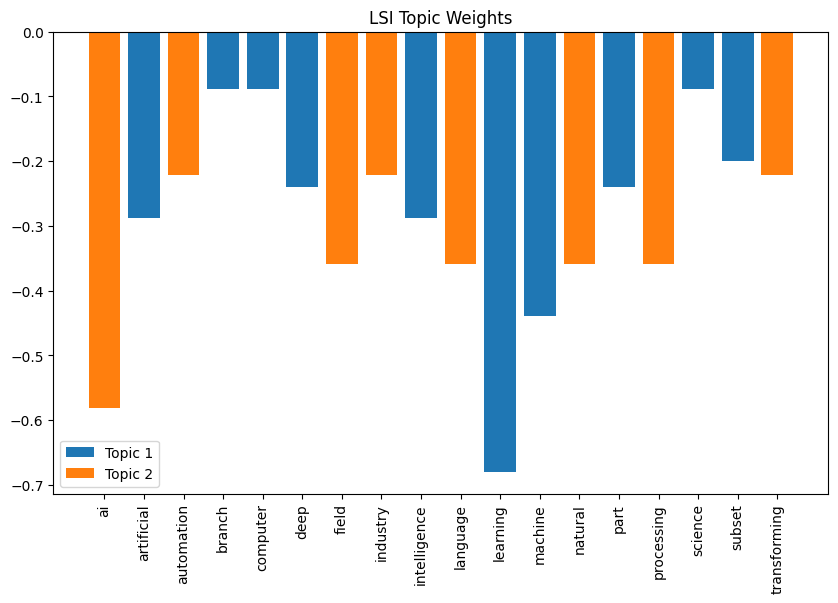

In [ ]:
!pip install nltk
!pip install gensim
!pip install matplotlib
!pip install seaborn

import gensim
import gensim.models
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Download required NLTK resources
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('punkt_tab') # Download the punkt_tab model

# Sample Corpus (Modify or Load Your Own Dataset)
documents = [
    "Artificial intelligence is a branch of computer science.",
    "Machine learning is a subset of artificial intelligence.",
    "Deep learning is part of machine learning.",
    "Natural language processing is a field of AI.",
    "AI is transforming industries with automation."
]

# --- Preprocessing Functions ---
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]  # Lemmatize & remove stopwords
    return " ".join(tokens)

preprocessed_docs = [preprocess_text(doc) for doc in documents]

# --- Different Bag of Words Models ---
# 1. Basic BoW (Word Counts)
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(preprocessed_docs)
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# 2. TF-IDF Weighted BoW
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_docs)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# 3. N-Gram Model (Bi-grams & Tri-grams)
ngram_vectorizer = CountVectorizer(ngram_range=(2,3))
ngram_matrix = ngram_vectorizer.fit_transform(preprocessed_docs)
ngram_df = pd.DataFrame(ngram_matrix.toarray(), columns=ngram_vectorizer.get_feature_names_out())

# --- Convert BoW to Gensim Format ---
def bow_to_gensim(matrix, vectorizer):
    words = vectorizer.get_feature_names_out()
    dictionary = corpora.Dictionary([words])
    corpus = [dictionary.doc2bow(doc.split()) for doc in preprocessed_docs]
    return dictionary, corpus

dictionary, corpus = bow_to_gensim(count_matrix, count_vectorizer)

# --- Train LSI Model ---
lsi_model = gensim.models.LsiModel(corpus, id2word=dictionary, num_topics=2)

# --- Print Topics ---
print("\nLSI Topics:")
for topic in lsi_model.print_topics(num_topics=2, num_words=5):
    print(topic)

# --- Compare Different BoW Models ---
print("\nBasic BoW Representation:\n", count_df)
print("\nTF-IDF Representation:\n", tfidf_df)
print("\nN-Gram Representation:\n", ngram_df)


# --- Visualization ---

# 1. Heatmap of TF-IDF Representation
plt.figure(figsize=(10, 6))
sns.heatmap(tfidf_df, annot=True, cmap="viridis")
plt.title("TF-IDF Representation Heatmap")
plt.show()

# 2. Bar Plot of LSI Topic Weights
topic_weights = lsi_model.get_topics()
num_topics = len(topic_weights)
num_words = len(tfidf_df.columns)

plt.figure(figsize=(10, 6))
for topic_id in range(num_topics):
    plt.bar(range(num_words), topic_weights[topic_id], label=f"Topic {topic_id + 1}")

plt.title("LSI Topic Weights")
plt.xticks(range(num_words), tfidf_df.columns, rotation=90)
plt.legend()
plt.show()